# what is Gradient Boosting?

Gradient Boosting is a machine learning technique used for regression and classification problems. 
It builds models in a stage-wise fashion by combining the predictions of several base estimators, 
typically decision trees. The key idea is to fit new models to the residuals of the previous models, 
thereby improving the overall prediction accuracy.


### Use Cases of Gradient Boosting
 
 Gradient Boosting is widely used in various domains due to its accuracy and versatility. Some common use cases include:
 
 - **Credit Scoring & Risk Assessment**: Used by financial institutions to predict loan defaults or assess creditworthiness.
 - **Customer Churn Prediction**: Helps companies predict which customers are likely to leave.
 - **Fraud Detection**: Commonly applied in banking and e-commerce to spot fraudulent transactions or activities.
 - **Medical Diagnosis**: Assists in predicting disease presence or outcomes from medical data.
 - **Ranking Problems**: Powers recommender systems and search engine ranking (e.g., web page ranking).
 - **Image and Speech Recognition**: While deep learning is more common, gradient boosting can be used for tabular features extracted from images or audio.
 - **Marketing & Sales Forecasting**: Predicts customer preferences, market trends, or product demand.
 

 In general, whenever you have structured/tabular data and need highly accurate predictions for classification or regression, gradient boosting is an excellent choice.


### How it works

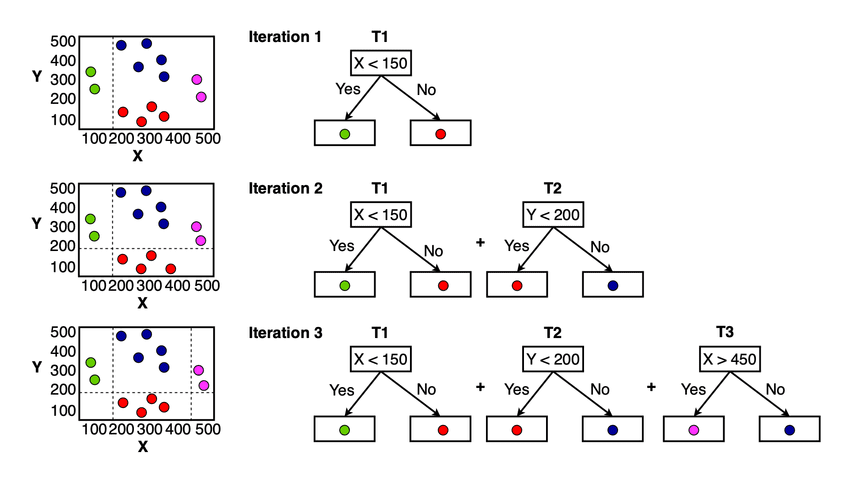


Gradient boosting operates on the principle of **gradient descent** in function space. The algorithm builds the model sequentially:

1. **Initialization**: Begin with a base model, often a simple constant prediction (e.g., the mean of the target variable for regression).
   
2. **Iterative Learning**: For each iterationm = 1 to M (where M  is the number of boosting rounds):
   - Compute the **residuals** (pseudo-residuals) as the negative gradient(y-ypred) of the loss function with respect to the current model's predictions. This identifies where the ensemble errs most. It is called gradient boosting, becuase negative gradient is used to optimize loss.
      - how to calculate negative gradient

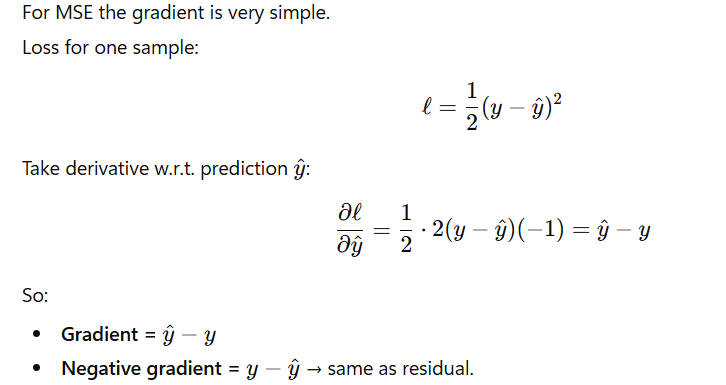


   - <span style="color: red">Fit a weak learner (e.g., a shallow decision tree) to these residuals. The weak learn predicts residual than action label</span>.
   - Update the ensemble by adding the weak learner's output, scaled by a learning rate eta (typically 0.01–0.3), to prevent overstepping:  
     
     ![Screenshot 2025-11-11 102812.png](<attachment:Screenshot 2025-11-11 102812.png>)

3. **Termination**: Stop after a predefined number of iterations or when validation performance plateaus, incorporating early stopping to avoid overfitting.

Common loss functions include mean squared error (MSE) for regression and log-loss for binary classification. The "gradient" aspect refers to optimizing these losses via their gradients.

#### Key Components and Hyperparameters
- **Weak Learners**: Shallow trees (e.g., depth 3–6) are standard, as they provide flexibility without high variance.
- **Learning Rate eta**: Controls step size; lower values require more iterations but improve generalization.
- **Subsampling**: Row (stochastic gradient boosting) and column sampling reduce correlation between trees and speed up training.
- **Regularization**: L1/L2 penalties on leaf weights, minimum child weight, and tree depth constrain complexity.

#### Advantages and Limitations
| Aspect          | Advantages                                                                 | Limitations                                                                 |
|-----------------|----------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **Performance** | High accuracy on tabular data; robust to outliers and missing values.      | Computationally intensive for large datasets; prone to overfitting without tuning. |
| **Flexibility** | Handles heterogeneous features; supports custom losses.                    | Less effective on very high-dimensional sparse data (e.g., text/images) compared to neural networks. |
| **Interpretability** | Feature importance scores derived from tree splits; partial dependence plots for insights. | Ensemble nature obscures individual predictions. |

#### Popular Implementations
Several optimized libraries have made gradient boosting accessible and efficient:

- **XGBoost (Extreme Gradient Boosting)**: Emphasizes speed and scalability with built-in cross-validation and regularization. Widely used in Kaggle competitions.
- **LightGBM**: Microsoft's library, optimized for large datasets via histogram-based splitting and leaf-wise growth, reducing memory usage.
- **CatBoost**: Yandex's tool, excels with categorical features by handling them natively without one-hot encoding.
- **Scikit-learn's GradientBoostingClassifier/Regressor**: A baseline implementation for prototyping.

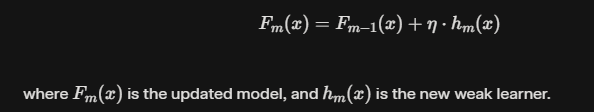



### Pros of Gradient Boosting:
1. High predictive accuracy: Gradient Boosting often provides better accuracy than other algorithms.
2. Flexibility: It can optimize on different loss functions and provides several hyperparameter tuning options.
3. Feature importance: It can provide insights into the importance of different features in the dataset.

### Cons of Gradient Boosting:
1. Overfitting: It can easily overfit the training data if not properly tuned.
2. Computationally intensive: Training can be slow, especially with large datasets and many estimators.
3. Requires careful tuning: The performance is sensitive to the choice of hyperparameters.


In [3]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


In [4]:

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target



In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [6]:
# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)



In [7]:
# Train the model
gb_clf.fit(X_train, y_train)



GradientBoostingClassifier(random_state=42)

In [8]:
# Make predictions on the test set
y_pred = gb_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%
